If you want to learn in deep about this problem check these links:
https://iamtrask.github.io/2015/07/12/basic-python-network/
https://youtu.be/h3l4qz76JhQ

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def nonlin(x, deriv=False):
    """ Returns the sigmod of a data or its derivative """
    if deriv:
        return x*(1-x)
    return 1/(1+np.exp(-x)) 

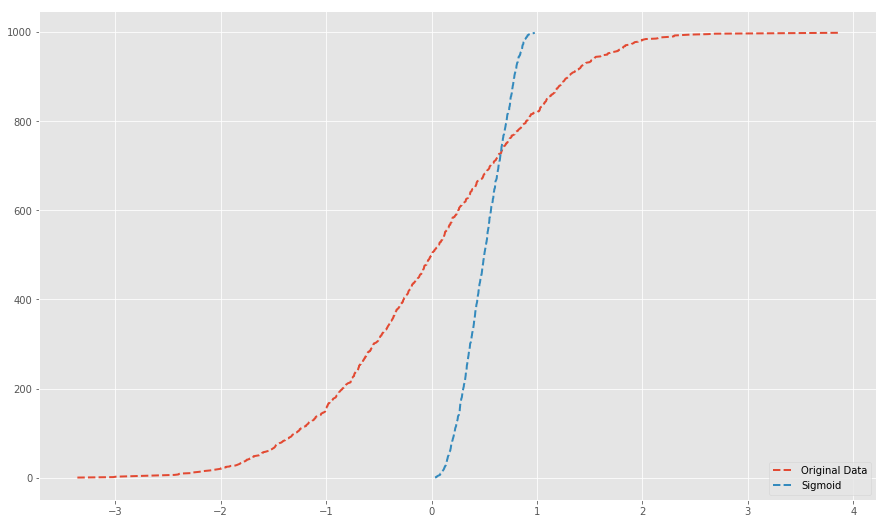

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

mu, std = 0, 1
data = np.random.normal(mu, std, 1000)

data_nonlin = [nonlin(d) for d in data]
data_deriv = [nonlin(d, True) for d in data]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,9))
data_lin, = ax.plot(sorted(data),range(1000), '--', linewidth=2,
                 label='Original Data')

line_nonlin, = ax.plot(sorted(data_nonlin), range(1000), '--', linewidth=2,
                 label='Sigmoid')

ax.legend(loc='lower right')
plt.show()

In [4]:
#input data
X = np.array([[0,0,1], 
              [0,1,1],
              [1,0,1],
              [1,1,1]])

In [5]:
#output data
y = np.array([[0],
             [1],
             [1],
             [0]])

In [6]:
np.random.seed(42)

In [7]:
# 3x4 matrix of weights ((2 inputs + 1 bias) x 4 nodes in the hidden layer)
weights_0 = 2 * np.random.random((3,4)) - 1
weights_0

array([[-0.25091976,  0.90142861,  0.46398788,  0.19731697],
       [-0.68796272, -0.68801096, -0.88383278,  0.73235229],
       [ 0.20223002,  0.41614516, -0.95883101,  0.9398197 ]])

In [8]:
# 4x1 matrix of weights. (4 nodes x 1 output) - no bias term in the hidden layer.
weights_1 = 2 * np.random.random((4,1)) - 1
weights_1

array([[ 0.66488528],
       [-0.57532178],
       [-0.63635007],
       [-0.63319098]])

In [9]:
for epoch in range(60000):
    # --------------- Forward Phase ----------------
    input_layer = X
    hidden_layer = nonlin(np.dot(input_layer, weights_0))
    output_layer = nonlin(np.dot(hidden_layer, weights_1))
    
    
    # --------------- Backward Phase ----------------
    # Back propagation of errors using the chain rule. 
    # Compute the error and the slope of the last layer
    output_error = y - output_layer
    if epoch % 10000 == 0:
        print("Error: {:2.6f}".format(np.mean(np.abs(output_error))))
        
    output_delta = output_error * nonlin(output_layer, deriv=True)
                                         
    # Compute the error and the slope of the hidden layer
    hidden_error = output_delta.dot(weights_1.T)
    hidden_delta = hidden_error * nonlin(hidden_layer, deriv=True)
    
    # Update weights
    weights_1 += hidden_layer.T.dot(output_delta)
    weights_0 += input_layer.T.dot(hidden_delta)
    
print("\nOutput after training:", output_layer.T)
print("Rounded values:", np.round(output_layer.T))
print("Expected values:", y.T)

Error: 0.500877
Error: 0.010714
Error: 0.007391
Error: 0.005972
Error: 0.005140
Error: 0.004578

Output after training: [[ 0.00214575  0.99510119  0.99585031  0.00546734]]
Rounded values: [[ 0.  1.  1.  0.]]
Expected values: [[0 1 1 0]]
